<a href="https://colab.research.google.com/github/Sarvagyam/Business-Analyst-Assignment/blob/main/AssignmentBA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [47]:
#data object created
df = pd.read_csv('/content/AssignmentBA2.csv')

In [48]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [49]:
#checking the null values of the Review Text column
df[df['Review Text'].isna()].shape

(845, 11)

In [50]:
#dropping those columns to properly analyze the data
df.dropna(subset=['Review Text'],inplace=True)

In [51]:
df.shape

(22641, 11)

#EDA

Text(0.5, 0, 'Ratings')

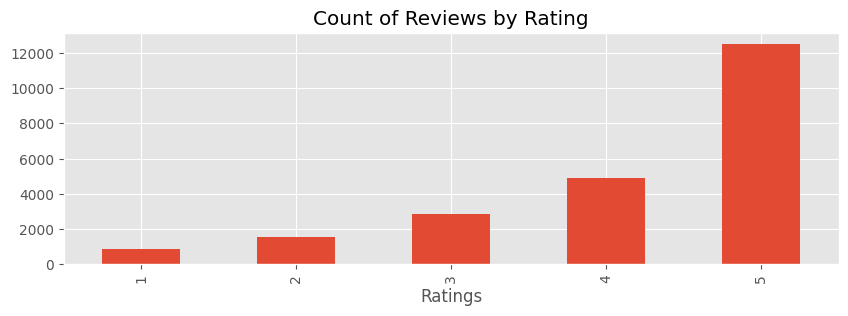

In [52]:
ax = df.Rating.value_counts().sort_index() \
      .plot(kind='bar',
            title='Count of Reviews by Rating',
            figsize=(10,3))

ax.set_xlabel('Ratings')
#Count of Reviews by ratings

The product over all ratings with respect to the data is nearer to 5, which means that users are more and more positive and there is a great response after buying the products.

##Word Frequency Analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The total number of words in the text is 1543044
The total number of words without punctuation is 1302532
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 

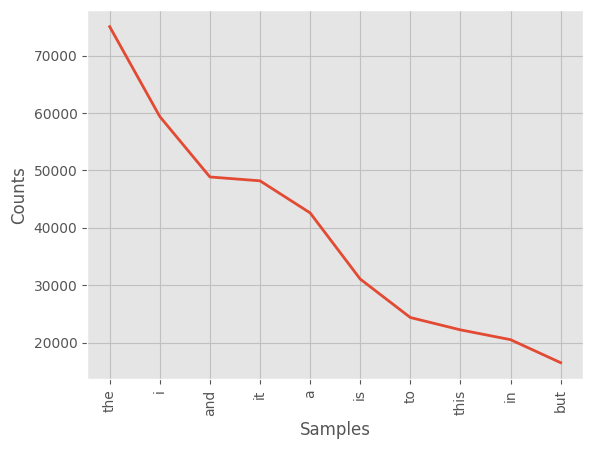

In [53]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords

text_file = df['Review Text']
text= ''
for index, row in df.iterrows():
  text = row['Review Text'] + text

words = word_tokenize(text)

#check the number of words
print(f"The total number of words in the text is {len(words)}")

fdist = FreqDist(words)

#print the 10 most common words
fdist.most_common(10)

words_no_punc = []

#iterate through the words list to remove punctuations
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

#print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

#find the frequency of words
fdist = FreqDist(words_no_punc)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

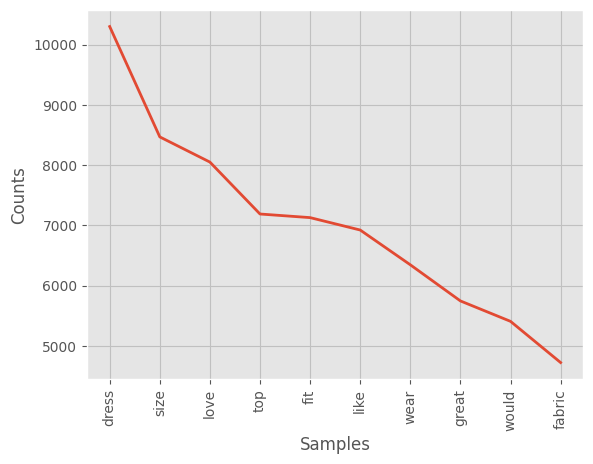

In [54]:
#Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

#list of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

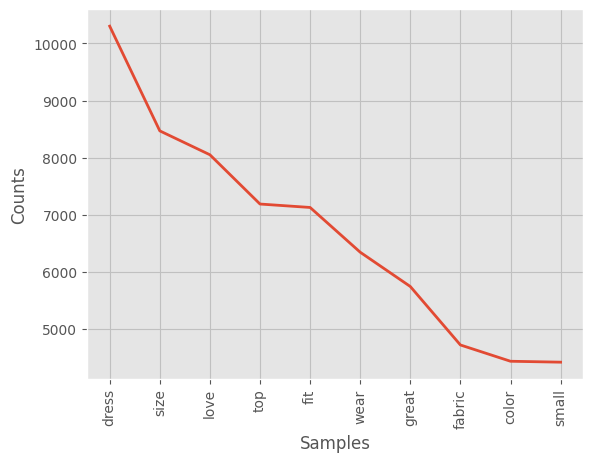

In [55]:
#Update the stopwords list
stopwords_list.extend(["said","one","like","came","back",'would'])

#create an empty list to store clean words
clean_words = []

#Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

#find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 10 most common words
fdist.plot(10)
plt.show()

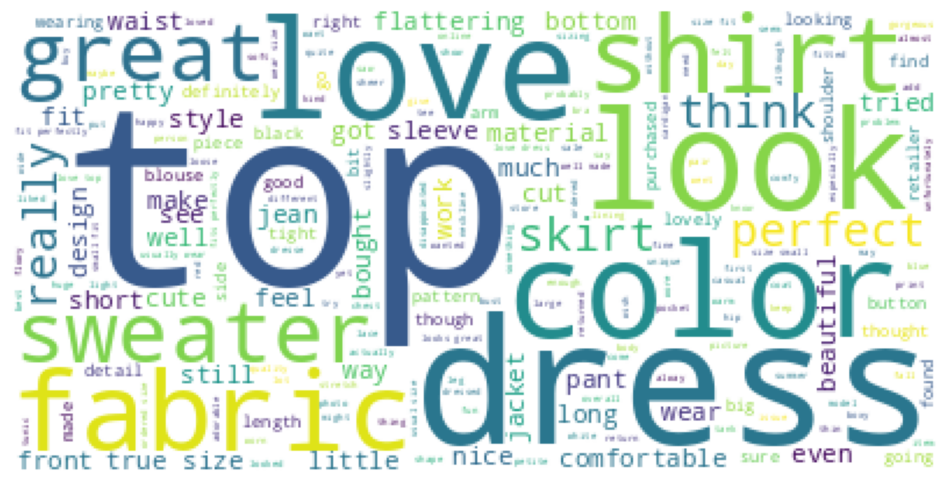

In [56]:
clean_words_string = " ".join(clean_words)

#generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

We can see that the top 10 words that are used are 'dress': 10302, 'size': 8470, 'love': 8052, 'top': 7190, 'fit': 7130, 'wear': 6347, 'great': 5747, 'fabric': 4724, 'color': 4439, 'small': 4423. The number is there frequency that users have used in all the reviews. With these frequencies we cna determine tht how much people are liking hte products and what is trending among the users.





##SENTIMENT ANALYSIS

Roberta pretrained model used for the sentiment analysis. The Review Text feature will be used to do the sentiment analysis.

In [57]:
review_ = df['Review Text'][10]
print(review_)

Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.


In [58]:
token = nltk.word_tokenize(review_)

In [59]:
tagged_tkn = nltk.pos_tag(token)

In [60]:
#chuning the review
chunk = nltk.chunk.ne_chunk(tagged_tkn)
chunk.pprint()

(S
  (GPE Dress/NNP)
  runs/VBZ
  small/JJ
  esp/NN
  where/WRB
  the/DT
  zipper/NNP
  area/NN
  runs/VBZ
  ./.
  i/NN
  ordered/VBD
  the/DT
  sp/NN
  which/WDT
  typically/RB
  fits/VBZ
  me/PRP
  and/CC
  it/PRP
  was/VBD
  very/RB
  tight/JJ
  !/.
  the/DT
  material/NN
  on/IN
  the/DT
  top/JJ
  looks/NNS
  and/CC
  feels/NNS
  very/RB
  cheap/VBP
  that/IN
  even/RB
  just/RB
  pulling/VBG
  on/IN
  it/PRP
  will/MD
  cause/VB
  it/PRP
  to/TO
  rip/VB
  the/DT
  fabric/NN
  ./.
  pretty/RB
  disappointed/JJ
  as/IN
  it/PRP
  was/VBD
  going/VBG
  to/TO
  be/VB
  my/PRP$
  christmas/NN
  dress/NN
  this/DT
  year/NN
  !/.
  needless/NN
  to/TO
  say/VB
  it/PRP
  will/MD
  be/VB
  going/VBG
  back/RB
  ./.)


In [61]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [62]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

We are using Roberta model as it is more accurate in predicting the sentiments as it can correctly judge sarcasm too.

If a review is sarcastically typed it can correctly predict if that is positive, negative or neutral.

In [63]:
#run for roberta model
encoded_rew = tokenizer(review_,return_tensors='pt')
output = model(**encoded_rew)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]}
print(scores_dict)

{'roberta_neg': 0.8403664, 'roberta_neu': 0.13353212, 'roberta_pos': 0.026101433}


The model is running properly and now we will  calculate the polarity for each review.

In [64]:
def polarity_scores_roberta(rev):
  encoded_rew = tokenizer(rev,return_tensors='pt')
  output = model(**encoded_rew)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores
  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]}
  return scores_dict


In [65]:
from tqdm import tqdm
res ={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  try:
    text= row['Review Text']
    myid= row['Unnamed: 0']
    roberta_result = polarity_scores_roberta(text)
    res[myid] = roberta_result
  except NaN :
    print('Null value found at : {}',myid)

100%|██████████| 22641/22641 [2:18:20<00:00,  2.73it/s]


In [66]:
res

{0: {'roberta_neg': 0.0022446474, 'roberta_neu': 0.010575601, 'roberta_pos': 0.9871797}, 1: {'roberta_neg': 0.0016088184, 'roberta_neu': 0.0074361395, 'roberta_pos': 0.99095505}, 2: {'roberta_neg': 0.36680278, 'roberta_neu': 0.38013998, 'roberta_pos': 0.2530573}, 3: {'roberta_neg': 0.0022465829, 'roberta_neu': 0.004622054, 'roberta_pos': 0.99313134}, 4: {'roberta_neg': 0.0012385903, 'roberta_neu': 0.0067331106, 'roberta_pos': 0.9920283}, 5: {'roberta_neg': 0.17049092, 'roberta_neu': 0.28356612, 'roberta_pos': 0.54594296}, 6: {'roberta_neg': 0.005863488, 'roberta_neu': 0.072108544, 'roberta_pos': 0.922028}, 7: {'roberta_neg': 0.009059633, 'roberta_neu': 0.14245181, 'roberta_pos': 0.8484886}, 8: {'roberta_neg': 0.0013973644, 'roberta_neu': 0.011456463, 'roberta_pos': 0.98714614}, 9: {'roberta_neg': 0.0034202386, 'roberta_neu': 0.027177004, 'roberta_pos': 0.9694027}, 10: {'roberta_neg': 0.8403664, 'roberta_neu': 0.13353212, 'roberta_pos': 0.026101433}, 11: {'roberta_neg': 0.0015834216, 'r

In [67]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'Unnamed: 0'})
result_df = result_df.merge(df, how='left')

In [68]:
result_df.head()

,Unnamed: 0,roberta_neg,roberta_neu,roberta_pos,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.002245,0.010576,0.987180,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.001609,0.007436,0.990955,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.002247,0.004622,0.993131,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.001239,0.006733,0.992028,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


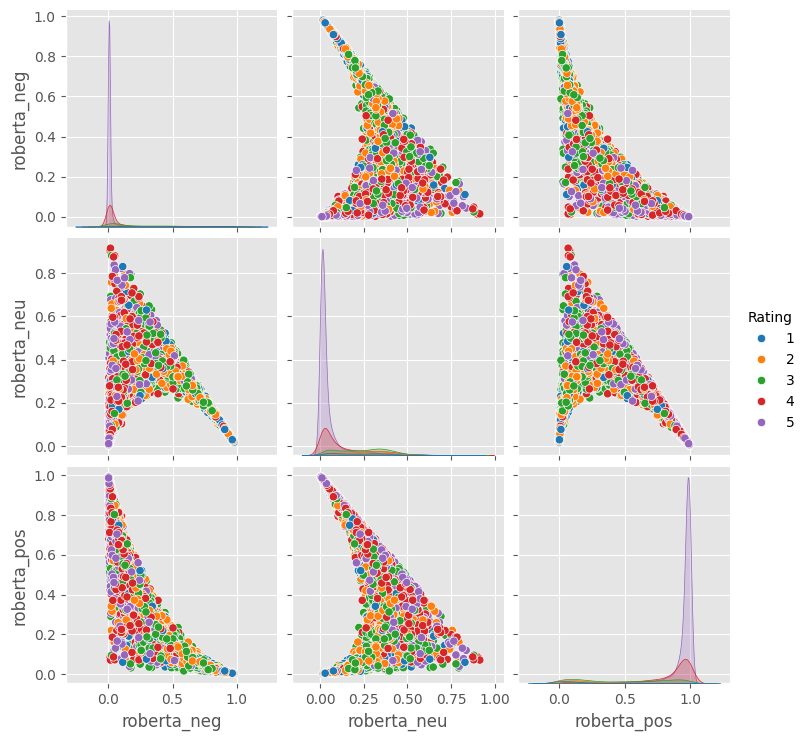

In [69]:
sns.pairplot(data=result_df,vars = ['roberta_neg','roberta_neu','roberta_pos'],
             hue='Rating',
             palette='tab10')
plt.show()

We can see the roberta model predicting correctly according to the ratings given, that means they are correlated proportionally.

We can directly see the scores that are mentioned in the dataset roberta model, to check the negativity, neutrality or positivity in the statement.

In [70]:
polarity = []
for i in res:
    if (res[i]['roberta_neg'] >= res[i]['roberta_neu']) and (res[i]['roberta_neg'] >= res[i]['roberta_pos']):
      polarity.append('Negative')
    elif (res[i]['roberta_neu'] >= res[i]['roberta_neg']) and (res[i]['roberta_neu'] >= res[i]['roberta_pos']):
      polarity.append('Neutral')
    else:
      polarity.append('Positive')

result_df['Sentiment'] = polarity

In [71]:
result_df.head()

,Unnamed: 0,roberta_neg,roberta_neu,roberta_pos,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,0.002245,0.010576,0.987180,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Positive
1,1,0.001609,0.007436,0.990955,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Positive
2,2,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral
3,3,0.002247,0.004622,0.993131,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Positive
4,4,0.001239,0.006733,0.992028,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Positive


We have added the column which shows the polarity or sentiment related to the reviews given. If the score of any neutra, negative or positive is maximum, then the sentence si predicted correctly stating the same.